In [6]:
#with this piece of code we measure the suitablity of data for PCA
#the first step is importing all of the necessary libraries for our task
#factor_analyzer is a library providing examinations of sphericity and kmo value on datasets
import pandas as pd
import numpy as np
from factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
from sklearn.preprocessing import StandardScaler

#locating the dataset prepared for our purposes
path = 'data/PCdata.csv'
X = pd.read_csv(path, index_col=None)

#scaling the data before any further actions can prevent biases relevant to vast variety in the variances
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

#calculating suitablity criteria
_, kmo_model = calculate_kmo(X)
bartlett = calculate_bartlett_sphericity(X)

print(f'The results indicate the KMO value of {kmo_model}')
print(f'And the P_value of {bartlett[1]} in bartlett test of sphericity')

The results indicate the KMO value of 0.914033610712792
And the P_value of 0.0 in bartlett test of sphericity


/home/kooloosh/anaconda3/envs/py37/lib/python3.7/site-packages/factor_analyzer/utils.py:249: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


In [19]:
#this part includes calculating pearson correlation of variables to each other
#a heatmap will be generated to better represent the information
#at last the figure is saved in output folder for closer inspections
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(80, 80))
sns.heatmap(X.corr(), cmap="mako")
plt.savefig('output/PearsonCorrelation.png')
plt.show()

<AxesSubplot:ylabel='cumulative_variance'>

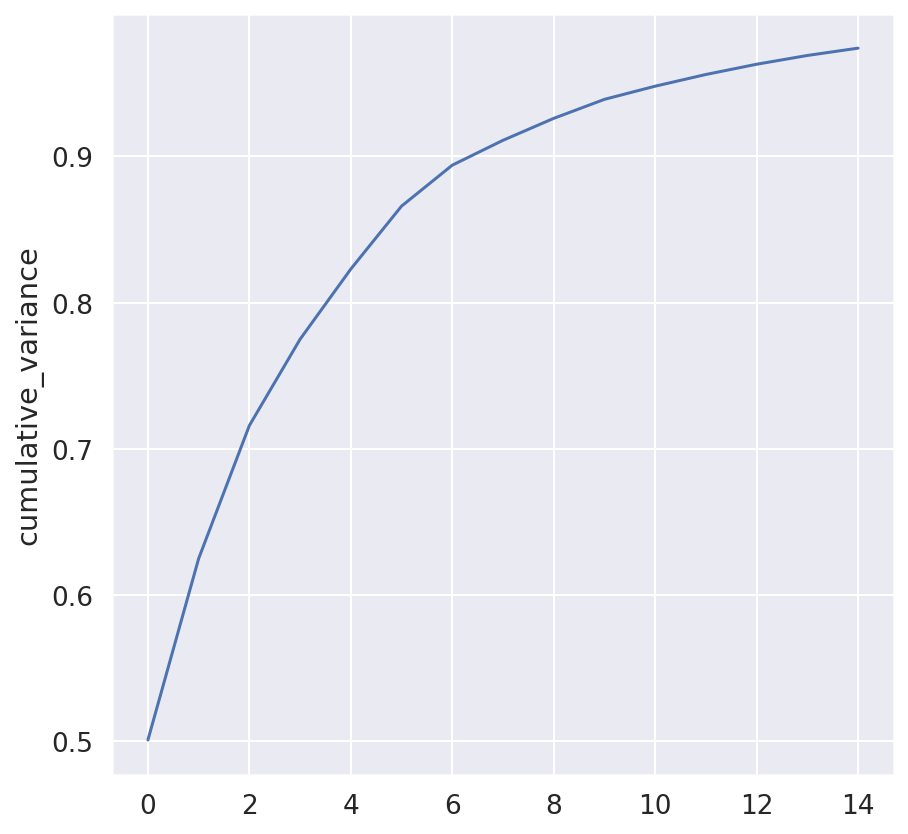

In [34]:
#now the PCA transformation is done by decomposition module
#the explained variance for 20 components is provided and illustrated in a cumulative format
#this helps highlighting the number of important components
from sklearn.decomposition import PCA

pca = PCA(n_components=15)
pca.fit(X)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(np.round(explained_variance, decimals=3))
sns.lineplot(data=pd.Series(cumulative_variance, name='cumulative_variance'))

<AxesSubplot:>

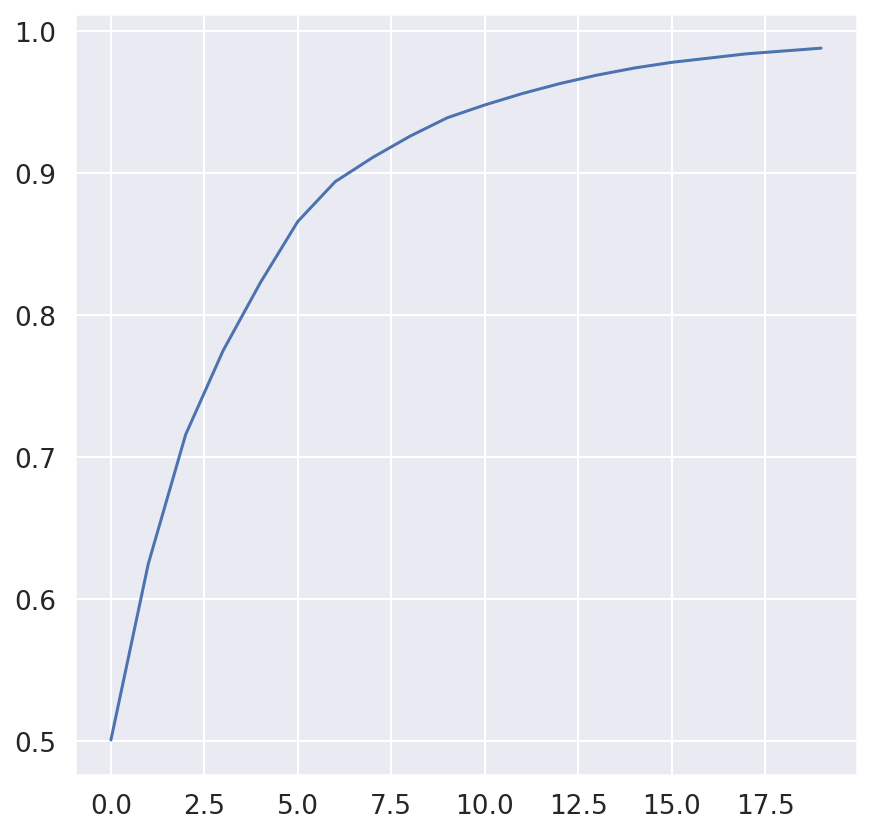

In [27]:
Loadings = pca.components_.T

In [25]:
cumulative_variance


array([0.501, 0.625, 0.716, 0.775, 0.823, 0.866, 0.894, 0.911, 0.926,
       0.939, 0.948, 0.956, 0.963, 0.969, 0.974, 0.978, 0.981, 0.984,
       0.986, 0.988])